In [1]:
#ипмпорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression

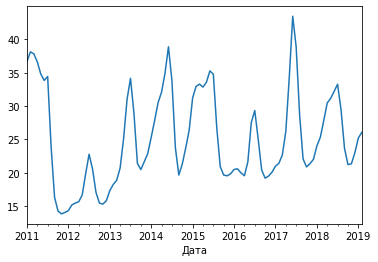

In [2]:
#чтение данных из файла + постройка графика
way = 'dz1.xlsx'
sb_data  = pd.read_excel(way , sheet_name='Sheet1', parse_dates = ['Дата'])
sb_series = sb_data.drop('Регион',axis =1 ).set_index('Дата').squeeze().asfreq('M')
sb_series.plot()

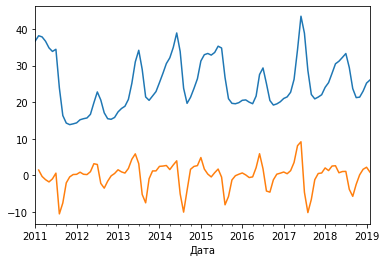

In [3]:
sb_series.plot()
sb_series.diff().plot()

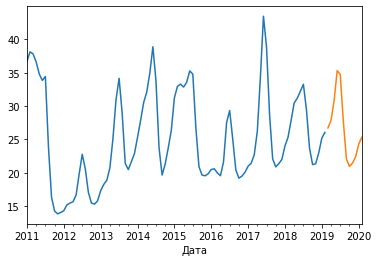

In [4]:
order = (3,1,1) #(p, d, q)
seasonal_order = (1,1,1,12) # (P, D, Q, Seasonal_step)
sarimax = SARIMAX(endog = sb_series, order = order, seasonal_order=seasonal_order)
sarimax = sarimax.fit() # Обучаем модель
forecast = sarimax.forecast(12)
sb_series.plot()
forecast.plot()
plt.show()

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

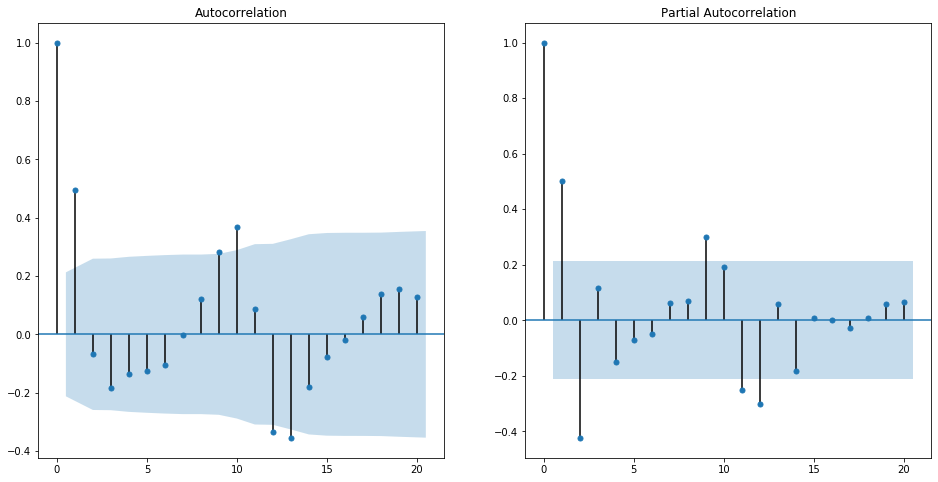

In [6]:
t = sb_series.diff().diff(12).dropna()

fig, ax = plt.subplots(1,2, figsize = (16,8))
plot_acf(t, ax = ax[0])
plot_pacf(t, ax = ax[1])
plt.show()

In [7]:
validation_split = sb_series.iloc[-12:]
validation_split.index
train_split = sb_series[~sb_series.index.isin(validation_split.index)] # красивый способ

In [8]:
forecast = SARIMAX(endog = train_split, order = (2,1,1), seasonal_order=(1,0,1,12))\
    .fit()\
    .forecast(len(validation_split))

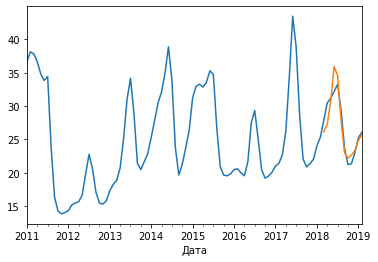

In [9]:
sb_series.plot()
forecast.plot()
plt.show()

In [10]:
mape = abs(forecast/validation_split-1).mean()
print(f'Господин начальник! Ошибка прогноза составила {mape:.2%}')

Господин начальник! Ошибка прогноза составила 4.69%
